<a href="https://colab.research.google.com/github/ohauglend/Topic-modeling-Billboard-Hot-100/blob/main/Final_code_billboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

#Importing libraries needed for scraping
import requests
import nltk
import spacy
import warnings
import time

!pip install --upgrade beautifulsoup4
from bs4 import BeautifulSoup
import os
import re
import numpy as np
import pandas as pd
import operator
import glob
import ast
import copy
import math
spacy.load('en_core_web_sm')


#Importing libraries needed for pre-processing
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

!pip install wordsegment
from wordsegment import load, segment
from collections import defaultdict
from math import log10

!pip install --upgrade gensim
import gensim
import sys
sys.setrecursionlimit(50000)
!pip install nlpcloud
import nlpcloud
from google.cloud import translate_v2
from textwrap import wrap



#Importing models needed for LDA
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
stop_words=set(nltk.corpus.stopwords.words('english'))
!pip install corpora
!pip install wordcloud
!pip install pyLDAvis==2.1.2
!pip install bokeh

import pyLDAvis.gensim
pyLDAvis.enable_notebook()
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
from gensim.models import CoherenceModel
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

from collections import Counter

from matplotlib.patches import Rectangle

from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn import datasets
#!pip install matplotlib --upgrade
import matplotlib.pyplot as plt

# libraries for EDA
from collections import Counter
import seaborn as sns
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import ast

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Scrapping

## generating the inital df

In [ ]:
# getting list of URLs
def billboardurls(y,l):
    years = []
    urls = []
    
    for i in range(y,l):
        years.append(i)
            
    for i in years:
        if i < 1950:
            raise 
        elif i in range(1950, 1956):
            opening = "Billboard_year-end_top_30"
        elif i in range(1956, 1958):
            opening = "Billboard_year-end_top_50"
        else:
            opening = "Billboard_Year-End_Hot_100"
        
        variable_url = opening + "_singles_of_" + str(i)
        final_url = "https://en.wikipedia.org/wiki/" + variable_url
        urls.append(final_url)
        
    return urls

In [ ]:
# Onboarding the URLs (if url works + checking if it's legal)
def onboarding(urls):
    listlegal = []
    for i in urls:
        response = requests.get(i)
        n = response.status_code is 200
        if i != True:
            listlegal.append(n)
        else:
            listlegal.append(i + " " + n)
    for i in listlegal:
        if i != True:
            print("One of the URLs was either non-existant, or illegal to access")
            return listlegal
    else:
        return print("All URLs onboarded")

In [ ]:
# Function that scrapes and dataframe it at the same time
def scraper_framer(urls):
    column_names = ["No.", "Title", "Artist(s)", "Top", "Year"]
    df = pd.DataFrame(columns = column_names)
    
    
    
    for url in urls:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        billboardtable = soup.find('table',{'class':"wikitable"})
        dftemp= pd.read_html(str(billboardtable))
        dftemp= pd.DataFrame(dftemp[0])

        # catching info about billboard
        top = "Top " +  str(re.findall('\d+|$', url)[0])
        year = re.findall("(\d+)(?!.*\d)", url)[0]

        # adding it to dataframe
        dftemp["Top"] = top
        dftemp["Year"] = year
        
        # concatenating
        df = pd.concat([df,dftemp])

    return df


<input>:16: DeprecationWarning: invalid escape sequence \d
<input>:16: DeprecationWarning: invalid escape sequence \d
<input>:17: DeprecationWarning: invalid escape sequence \d
<input>:16: DeprecationWarning: invalid escape sequence \d
<input>:17: DeprecationWarning: invalid escape sequence \d
<input>:16: DeprecationWarning: invalid escape sequence \d
<input>:17: DeprecationWarning: invalid escape sequence \d
<input>:16: DeprecationWarning: invalid escape sequence \d
<input>:17: DeprecationWarning: invalid escape sequence \d
<input>:16: DeprecationWarning: invalid escape sequence \d
<input>:17: DeprecationWarning: invalid escape sequence \d
<input>:16: DeprecationWarning: invalid escape sequence \d
<input>:17: DeprecationWarning: invalid escape sequence \d
<input>:16: DeprecationWarning: invalid escape sequence \d
<input>:17: DeprecationWarning: invalid escape sequence \d
<input>:16: DeprecationWarning: invalid escape sequence \d
<input>:17: DeprecationWarning: invalid escape sequence 

In [ ]:
# Polishing and Grooming the DataFrame

def bathtub(df):
    df.insert(0, 'ID', range(1, len(df) + 1))
    df["Title"] = df["Title"].str.replace(r"[\"]", '')
    df.drop(columns=df.columns[6], 
        axis=1, 
        inplace=True)
    return df

In [ ]:

# Main bilboard_getter
def billboardgetter(y,l):
    billboardurls(y,l)
    onboarding(billboardurls(y,l))
    scraper_framer(billboardurls(y,l))
    bathtub(scraper_framer(billboardurls(y,l)))
    
    df = (bathtub(scraper_framer(billboardurls(y,l))))
    
    
    ## implementing title change to match genius url
    df["Title"] = [re.sub("\s?\)\s?", "", re.sub("\s?\(\s?", " ", s)) if  re.sub("\s?\(\s?|\s?\)\s?", " ", s)[-1]==" " else re.sub("\s?\(\s?|\s?\)\s?", " ", s) for s in df["Title"].tolist()]
    
    return df



<input>:13: DeprecationWarning: invalid escape sequence \s
<input>:13: DeprecationWarning: invalid escape sequence \s
<input>:13: DeprecationWarning: invalid escape sequence \s
<input>:13: DeprecationWarning: invalid escape sequence \s
<input>:13: DeprecationWarning: invalid escape sequence \s
<input>:13: DeprecationWarning: invalid escape sequence \s
<input>:13: DeprecationWarning: invalid escape sequence \s
<input>:13: DeprecationWarning: invalid escape sequence \s
<input>:13: DeprecationWarning: invalid escape sequence \s
<input>:13: DeprecationWarning: invalid escape sequence \s
<input>:13: DeprecationWarning: invalid escape sequence \s
<input>:13: DeprecationWarning: invalid escape sequence \s
<input>:13: DeprecationWarning: invalid escape sequence \s
<input>:13: DeprecationWarning: invalid escape sequence \s
<input>:13: DeprecationWarning: invalid escape sequence \s
<input>:13: DeprecationWarning: invalid escape sequence \s
<ipython-input-6-69638fe0b5ed>:13: DeprecationWarning: i

### Generating the initial dataframe

In [ ]:
df = billboardgetter(1950,2022)
df["About"] = [None for _ in range(len(df))]
df["Lyrics"] = [None for _ in range(len(df))]

df

All URLs onboarded


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


,ID,No.,Title,Artist(s),Top,Year,About,Lyrics
0,1,1,Goodnight Irene,Gordon Jenkins & The Weavers,Top 30,1950,None,None
1,2,2,Mona Lisa,Nat King Cole,Top 30,1950,None,None
2,3,3,Third Man Theme,Anton Karas,Top 30,1950,None,None
3,4,4,Sam's Song,Gary & Bing Crosby,Top 30,1950,None,None
4,5,5,Simple Melody,Gary & Bing Crosby,Top 30,1950,None,None
...,...,...,...,...,...,...,...,...
95,6628,96,Things a Man Oughta Know,Lainey Wilson,Top 100,2021,None,None
96,6629,97,Throat Baby Go Baby,BRS Kash,Top 100,2021,None,None
97,6630,98,Tombstone,Rod Wave,Top 100,2021,None,None
98,6631,99,Drinkin' Beer. Talkin' God. Amen.,Chase Rice featuring Florida Georgia Line,Top 100,2021,None,None


In [ ]:
#Checking for missing years in df
#If new then use this one
years = [str(i) for i in range(1950,2022)]


missing_years = []

lst = list(set(df["Year"].tolist()))
lst.sort()

for i in lst:
    if not i in years:
        missing_years.append(i)
        
missing_years



[]

## Scraping 

In [ ]:
def genius_about(url,
                 encoding = "utf-8"):
    
    
    nlp = spacy.load("en_core_web_sm")
    

    #we are using request package to make a GET request for the website, which means we're getting data from it.
    #returns nothing if the url cant be reached
    try:
        r=requests.get(url, timeout=2)
    except:
        warnings.warn("The system could not access the url on this iteration.", DeprecationWarning)
        return

    #Setting the correct text encoding of the HTML page
    r.encoding = encoding

    #Extracting the HTML from the request object
    html = r.text

    # Creating a BeautifulSoup object from the HTML
    soup = BeautifulSoup(html)

    # Getting the text out of the soup
    text = soup.get_text()



    tokens = nlp(text)
    count = 0
    corp = ""
    
    for sent in tokens.sents:
        corp += sent.text.strip()
        count +=1
    
    
    c = copy.deepcopy(corp)
    
    #A bad/non-existing url at genius always starts with Burrr!
    if (c[0:6] == "Burrr!"):
        return
    
   


    #Removing empty lines
    c = os.linesep.join([s for s in corp.splitlines() if s])
    #print(c)


  
    
    #If The song bio is unreviewed this will trigger the first exception
    try:
        try:
            about = re.split("\s*mode\s*About\s*Genius\s*Annotation\s*", c)[1]
        except:
            about = re.split("\s*Annotation\d", c)[1]

        about = re.split("Ask us a question about this song", about)[0]
        
        #If The song bio is unreviewed this will trigger the exception
        try:
            about = re.split(r"^\d+", about)[1]
        except:
            about = about
        
        about = "".join(re.split('(\.)',about)[:len(about.split("."))+3])
        about = re.split("\s?contributors?", about)[1]

        if(about[-1]!= "."):
            about += "."
    except:
        about = None
    
    
    #If The song bio is unreviewed this will trigger the first exception
    try:
        lyrics = re.split('Lyrics\[.?', c)[1]
    except:
        try:
          lyrics = "".join(re.split('(?<=[cC]redits)(.*)(?<=[lL]yrics([A-Za-z]))', c)[2:])
        except:
          lyrics = None
          return about, lyrics


    #Splitting on lower bound of lyrics
    lyrics = re.split("[^\s]embedcancelhow", lyrics.lower())[0]


    #Sometimes the url is falty, in that it accesses the HTML file of the site rather than the content, 
    #the function then returns about and None for lyrics
    if re.search("(?=.*align)(?=.*desktop)|(?=.*align)(?=.*box)", lyrics):
      lyrics = None
      return about, lyrics
    
    
    
    #Sometimes the lyrics dosent include ] -> after the join, lyrics will be stored as ""
    l = copy.deepcopy(lyrics)
    lyrics = "".join(re.split("\]", lyrics)[1:len(re.split("\]", lyrics))])
    if (lyrics == ""):
        lyrics = l
    
    #Filtering out [chorus and [verse before removing ]
    lyrics = re.sub("\[chorus"," ", lyrics)
    lyrics = re.sub("\[verse\s/*\d"," ",lyrics)
    lyrics = re.sub("\[pre-chorus"," ", lyrics)
    lyrics = re.sub("\[post-chorus"," ", lyrics)

  
    #Sometimes the lyrics dosent include [ -> after the join, lyrics will be stored as ""
    l = copy.deepcopy(lyrics)
    lyrics = "".join(re.split("\[", lyrics)[:len(re.split("\[", lyrics))-1])
    if (lyrics == ""):
        lyrics = l

    
    return about, lyrics 
    


In [ ]:


# getting list of URLs
def corp_func(df):
    
    corp = {}
    
   
    # Song patterning
    songs_raw = df['Title'].tolist()
    songs = df['Title'].tolist()
    songs = [each_song.lower() for each_song in songs]
    songs = [each_song.replace(" ", "-") for each_song in songs]
    songs = [each_song.replace("&", "and") for each_song in songs]
    songs = [each_song.replace("+", "") for each_song in songs]
    songs = [each_song.replace("'", "") for each_song in songs]
    
    
    dic = {}
    

    #Generating Arstist variants
    for i in range(len(df)):
        artist_variants = []
        artists = df["Artist(s)"].iloc[i]
        artists = artists.lower().capitalize()

        if(re.search("\s?[aA]nd\s?", artists)):
            artist_variants.append(re.split("\s?[aA]nd\s?", artists)[0].replace(" ", "-"))
            artist_variants.append(re.split("\s?[aA]nd\s?", artists)[1].replace(" ", "-"))
            
        if(re.search("\s?[fF]eaturing\s?", artists)):
            artist_variants.append(re.split("\s?[fF]eaturing\s?", artists)[0].replace(" ", "-"))
            artist_variants.append(artists.replace("\s?[fF]eaturing\s?"," and ").replace(" ", "-"))
        
        if(re.search("\s?\(\s?|\s?\)\s?", artists)):
            artist_variants.append(re.split("\s?\(\s?", artists)[0].replace(" ", "-"))
            a = re.sub("\(", ' ', artists)
            artist_variants.append(re.sub("\)", '', a).replace(" ", "-"))
        
        artist_variants.append(artists.replace(" ", "-")) 
            
        dic[songs[i]] = artist_variants
      
    
    #Looping through and genrating url variants
    count = 0
    for key, value in dic.items():
        
        #Implementing a delay to every batch call to not overload the server
        time.sleep(1.5)
        count += 1
        for entry in value:
            if genius_about("https://genius.com/" + entry +"-"+key+ "-lyrics") != None:
                
                try:
                    about, lyrics = genius_about("https://genius.com/" + entry +"-"+key+ "-lyrics")

                    #Using the ID of the song as the dictionary key 
                    corp[df["ID"].iloc[count]] = [songs_raw[count-1], about, lyrics]
        
                except:
                    print("Bad_url")
                    
               
           
    
    return corp

 
            


### Initiating the scraping, when implemented this is ran over several iterations

In [ ]:
#Calling the corp_func and updating the first dataframe

c = corp_func(df)

About = []
Lyr = []
IDS = []
titles = []


for key in c.keys():
  IDS.append(key)
  titles.append(c[key][0])
  About.append(c[key][1])
  Lyr.append(c[key][2])


df = pd.DataFrame({'ID': IDS, 
                    'Title': titles, 
                    'About': About, 
                    'Lyrics': Lyr},)


### Function for updating already existing dataframe

In [ ]:


def uptading_df(df,
                year_range,
                artist_col = "Artist(s)",
                Index_col = "ID",
                about_col = "About",
                lyrics_col = "Lyrics"):
    
    """
    The function takes in a dataframe and a year_range (lst of int) as non-default arguments.
    Default arguments include 
        artist_col - string of column name telling the system which column the artists are found
        about_col - string of column name telling the system which column the abouts are found
        lyrics_col - string of column name telling the system which column the lyrics are found
    The function calls corp_func, which generates urls based on the dataframe, and calls genius_about
        which enters the url and scrapes the about and lyrics from the site, it is returned as (about, lyrics)
    corp_func returns a dictionary of {Song title : [about, lyrics]}
    """
    
    artists = df[artist_col].tolist()
    abouts = df[about_col].tolist()
    lyrics = df[lyrics_col].tolist()
    indexes = df[Index_col].tolist()
    
    for year in year_range:
        c = corp_func(df[df["Year"]==year])
        for i in range(len(df)):
            for j in list(c.keys()):
                if(indexes[i] == j):
                    if(math.isnan(abouts[i])):
                        abouts[i] = c[j][1]
                    if(math.isnan(lyrics[i])):
                        lyrics[i] = c[j][2]
                       
                    

    
    df[about_col] = abouts
    df[lyrics_col] = lyrics
    
    return df
        
        
    

#Pre-processing

## Defining custom stopwords

In [ ]:
#Declaring extra stop words 
extstopwords = ["yuh","nothin","gettin","lookin","ima","hey","tryna","huh","woo","bout","woah","int","theyll", "ill", "five","thirty", "yay", "yayaya", "yayayayaya", "hahahaha", "hahahahahaha", "gonna", "haha", "hahaha", "lala", "lalala", "lalalalala", "lalalala", "lalalalalala","ive","wanna","bit",'ooh',"oooh","gon","wan","...","mmm","nanana", "yeah", "wow", "cant", "icant", "dont","havent","isnt","didnt","couldnt","shouldnt","wont","wasnt","youre","wanted","even","got","0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you","youd", "you'd", "you'll", "your","youre","you're","yours","yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz", 'vocal', 'include', 'group', 'sound', 'contemporary',"song", "album", "release", "video", "record", "billboard", "chart", "singer", "write", "official", "interview", "expand", "time", "songwriter", "alongside", "verse", "refference", "explain", "thing", "fan", "play", "lyric", "announce", "award", "popular", "extremely", "continue", "bring", "debut", "lead", "chorus", "track", "previous", "channel", 'single','hit','music','peak','reach','number','band','feature','version','studio','year','top','week','country','title','originally',"come","happen","music","theresa","search","beat","sing","inside","youve","till","gotta","count","whoa","ing","song", "album", "release", "video", "record", "billboard", "chart", "singer", "write", "official", "interview", "expand", "time", "songwriter", "alongside", "verse", "refference", "explain", "thing", "fan", "play", "lyric", "announce", "award", "popular", "extremely", "continue", "bring", "debut", "lead", "chorus", "track", "previous", "channel","people","talk","person","intend","adult","tell","solo","soundtrack","grammy","receive","theme","style","member","live","rhythm","april","high","canada","original","label","tune","february","january","march","november","december","september","october","producer","state","story","artist","hot100","make""guitar","live",'success', 'film', 'cover','produce','biggest', "come","happen","music","theresa","search","beat","sing","inside","youve","till","gotta","count","whoa","ing","song", "album", "release", "video", "record", "billboard", "chart", "singer", "write", "official", "interview", "expand", "time", "songwriter", "alongside", "verse", "refference", "explain", "thing", "fan", "play", "lyric", "announce", "award", "popular", "extremely", "continue", "bring", "debut", "lead", "chorus", "track", "previous", "channel", 'vocal', 'include', 'group', 'sound', 'contemporary',"song", "album", "release", "video", "record", "billboard", "chart", "singer", "write", "official", "interview", "expand", "time", "songwriter", "alongside", "verse", "refference", "explain", "thing", "fan", "play", "lyric", "announce", "award", "popular", "extremely", "continue", "bring", "debut", "lead", "chorus", "track", "previous", "channel", 'single','hit','music','peak','reach','number','band','feature','version','studio','year','top','week','country','title','originally',"come","happen","youll","take","weve","long","gotta", "till", "youve", "youll", "dosent", "talk","chrisdrop","chris","drake","thing", "turn", "low", "ing", "iain", "type", "ami", "as", "nanananah","mmmm", "whoop", "lemme", "dsososofunkdafiedsosos", "gat", "lama", "vers1","nah","lemme","opc","mon","ita"]

## Defining pre-processing helping functions, defined based on the needs of lyrics

In [ ]:



# Function That fixes slangish gerundy (bustin', getin'...)
def fixingerundy(song):
    newsong = song.replace("in'", "ing ")
    return newsong
        
# Function That Tokenizes a song using WordSegment library -> Returns a list of strings with song tokenized into wordss
def WordTokenizer(song):
    load()
    tokenized_song = segment(song)
    return tokenized_song


# Function that removes stopwords (based on nltk's stopwords list) + extra stop words
# -> Returns a list of strings that with only meaningful words

def RemoveStopwords(song):
    stop_words = stopwords.words('english')
    
    # Stopwords list extended with the extra stop words
    stop_words.extend(extstopwords)
    cleaned_song = []

    # Words that are less than two characters long are removed to prevent meaningless words from affecting the model
    for word in song:
        if (word not in stop_words) and (len(word)>2):
          cleaned_song.append(word)
    return cleaned_song 


# Function for defining and labeling entities
def NER(lst):
  nlp = spacy.load("en_core_web_sm")
  unwantedner = ["DATE","MONEY","PERCENT","QUANTITY","TIME","LANGUAGE","LAW", "ORDINAL", "CARDINAL"]
  try:
    for ent in nlp(" ".join(lst)).ents:
      lst.remove(ent.text)

      if (ent.label_ not in unwantedner):
        lst.append(ent.label_)
  except ValueError:
    pass

  return lst


# Function for lematizing the words of a song using WordNetLemmatizer()
#returns a list of strings with each word is lemmatized

def Lemmatize(song):
    wnl = WordNetLemmatizer()
    newsong = []
    for word, tag in pos_tag(song):
        wntag = tag[0].lower()
        wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
        if not wntag or word.isupper() == True:
            lemma = word
        else:
            lemma = wnl.lemmatize(word, wntag)
        newsong.append(lemma)
            
    return newsong


# Function for removing numeric characters from a song
# returns a list of strings with all numbers removed
def RemoveNums(song):

    for word in song:
      if word.isnumeric()==True:
         song.remove(word)
    return song


# Function for removing long words from one song
# returns a list of strings with all long words removed
def RemoveLongWords(song):
  for word in song:
      if len(word)>=15:
         song.remove(word)
  return song

## Calling main pre-processing function

In [ ]:
# Main function calling previous subfunctions defined in this file to get the corpus ready for the Model
# Takes min_words is an integer
# Returns a list of strings with the song(tokenized, no endline chars, no stopwords, no numbers, all lower case, lemmatized)
# Returns empty list for songs that are less than @min_words long.

def PreprocessDocs(song):
  song=fixingerundy(song)
  song=WordTokenizer(song)
  song=RemoveStopwords(song)
  song=NER(song)
  song=Lemmatize(song)
  song=RemoveNums(song)
  song=RemoveLongWords(song)
  return song

In [ ]:
#Using PreprocessDocs to update the dataframe
pre_processed_lyr = []
pre_processed_about = []

for i in range(len(df)):
  pre_processed_lyr.append(df["Lyrics"].iloc[i])
  pre_processed_about.append(df["About"].iloc[i])

df["Pre-processedlyrics"] = pre_processed_lyr
df["Pre-processedabout"] = pre_processed_about


# Updating the dataframe

This section is aimed at providing code for cleaning up the issues we ran into with scraping. 
It is also worth noting that we stored the data frame in different years, so this section of the notebook also combines the different years to one dataframe.

The section addresses the following:

* Combining the different years into one data frame.

* Removing and updating instances where the scraper extracted data from the HTML file instead of the lyrics, this was the case for around 50 songs.

In [ ]:
#Combining the years to one data frame:

folder_path = FOLDER PATH


df = pd.read_csv(FIRST ENTRY IN FOLDER)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

#Looping through the folder except the first entry
count = 0
for filename in os.listdir(folder_path):
  count +=1
  if count <= 1:
    continue
  
  #Indexes are the rows where the lyrics are not Nan
  df2 = pd.read_csv(folder_path +"/"+ filename)
  df2 = df2.loc[:, ~df2.columns.str.contains('^Unnamed')]
  df = df.append(df2, ignore_index=True)
  


df = df.drop(columns = ["Top"])



In [ ]:
#Defining a function for updating the dataframe

def uptading_df(df,
                other_df,
                Index_col = "ID",
                no_col = "No.",
                artist_col = "Artist(s)",
                year_col = "Year",
                about_col = "About",
                lyrics_col = "Lyrics",
                lab_col = "Labels"):
    
    """
    The function takes in a dataframe and a year_range (lst of int) as non-default arguments.
    Default arguments include 
        artist_col - string of column name telling the system which column the artists are found
        about_col - string of column name telling the system which column the abouts are found
        lyrics_col - string of column name telling the system which column the lyrics are found
    The function calls corp_func, which generates urls based on the dataframe, and calls genius_about
        which enters the url and scrapes the about and lyrics from the site, it is returned as (about, lyrics)
    corp_func returns a dictionary of {Song title : [about, lyrics]}
    """
    
    indexes = df[Index_col].tolist()
    abouts = df[about_col].tolist()
    lyrics = df[lyrics_col].tolist()
    pre_pros_lyr = df["Pre-processedlyrics"].tolist()
    pre_pros_ab = df["Pre-processedabout"].tolist()
    
    
    
    for i in range(len(df)):
      for j in range(len(other_df)):
        if(df[Index_col].iloc[i] == other_df[Index_col].iloc[j]):
          abouts[i] = other_df[about_col].iloc[j]
          lyrics[i] = other_df[lyrics_col].iloc[j]
          pre_pros_lyr[i] = other_df["Pre-processedlyrics"].iloc[j]
          pre_pros_ab[i] = other_df["Pre-processedabout"].iloc[j]
      
      if(type(abouts[i]) == str):
        if re.search("(?=.*align)(?=.*desktop)|(?=.*align)(?=.*box)", abouts[i]):
          abouts[i] = "This song has no about"
      else:
        abouts[i] = "This song has no about"
      
      
      if(type(lyrics[i]) == str):
        if re.search("(?=.*align)(?=.*desktop)|(?=.*align)(?=.*box)", lyrics[i]):
          lyrics[i] = "This song has no lyrics"
      else:
        lyrics[i] = "This song has no lyrics"

      
      if(type(pre_pros_ab[i]) == str):
        if re.search("(?=.*align)(?=.*desktop)|(?=.*align)(?=.*box)", pre_pros_ab[i]):
          pre_pros_ab[i] = "This song has no about"
      else:
        pre_pros_ab[i] = "This song has no about"
      
      
      if(type(pre_pros_lyr[i]) == str):
        if re.search("(?=.*align)(?=.*desktop)|(?=.*align)(?=.*box)", pre_pros_lyr[i]):
          pre_pros_lyr[i] = "This song has no lyrics"
      else:
        pre_pros_lyr[i] = "This song has no lyrics"

    

                    

    
    df[about_col] = abouts
    df[lyrics_col] = lyrics
    df["Pre-processedlyrics"] = pre_pros_lyr
    df["Pre-processedabout"] = pre_pros_ab
    
    return df
        

In [ ]:
#Using the updating_df function, here on the fixed file containing the entries where the scraper accessed the HTML file

pre_p_html_df = pd.read_csv(FILE PATH)

pre_p_html_df["ID"] = pd.to_numeric(pre_p_html_df["ID"], downcast = "integer")

df = uptading_df(df, pre_p_html_df)

## Removing non-English songs

In [ ]:
def detect_foreign_language(string,
                   target_language_code = 'en',
                   project_id = PROJECT ID,
                   application_credentials_location = APPLICATION CREDENTIAL LOCATION):

  #Setting credentials
  os.environ["PROJECT_ID"] = project_id
  os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = os.path.abspath(application_credentials_location)
  
  #Google cloud translate API used for detecting language and translating it
  translate_client = translate_v2.Client()

  
  batches = wrap(string, 190)

  

  #The wrap function only works on the english language, meaning if a another language is passed it does not seperate 
  if(len(batches[0]) > 190):
    warnings.warn("The language of the lyrics is not english")
    return None
  

  return_lst = []

  for i in range(len(batches)):
    
      #Responses is a list of dictionaries containing the output of each entry in the input list
      responses = translate_client.translate(batches[i], target_language=target_language_code)

      
      if(type(responses) != "lst"):
        responses = [responses]

      item_lst = []
      
      for j in range(len(responses)):
          if(responses[j]["detectedSourceLanguage"] == "es" or responses[j]["detectedSourceLanguage"] == "fr" or responses[j]["detectedSourceLanguage"] == "it" or responses[j]["detectedSourceLanguage"] == "de"):
            return None
        


  return "English song"


In [ ]:
#Removing non-English songs:
lyr_lst = df["Lyrics"].tolist()
lyr_pre_pros = df["Pre-processedlyrics"].tolist()
about_lst = df["About"].tolist()
about_pre_pros = df["Pre-processedabout"].tolist()
for i in range(len(df)):
  l = df["Lyrics"].iloc[i]
  if(not l or type(l) == float):
    continue
  lyr = detect_foreign_language(l)
  if(not lyr):
    lyr_lst[i] = None
    lyr_pre_pros[i] = None
    about_lst[i] = None
    about_pre_pros[i] = None
  
df["Lyrics"] = lyr_lst
df["About"] = about_lst
df["Pre-processedlyrics"] = lyr_pre_pros
df["Pre-processedabout"] = about_pre_pros

df

# EDA

In [ ]:
# dataframes for lyrics and about section

df_all_lyrics = df_all[['Year', 'Pre-processedlyrics']]
df_all_lyrics = df_all_lyrics.dropna(subset=['Pre-processedlyrics'])

df_all_about = df_all[['Year', 'Pre-processedabout']]
df_all_about = df_all_about.dropna(subset=['Pre-processedabout'])

In [ ]:
# support function to clean the data

# list of lyrical stop-words
list_exclude_about = list(set(["come","happen","music","theresa","search","beat","sing","inside","youve","till","gotta","count","whoa","ing","song", "album", "release", "video", "record", "billboard", "chart", "singer", "write", "official", "interview", "expand", "time", "songwriter", "alongside", "verse", "refference", "explain", "thing", "fan", "play", "lyric", "announce", "award", "popular", "extremely", "continue", "bring", "debut", "lead", "chorus", "track", "previous", "channel"]+list(set(["people","talk","person","intend","adult","tell","solo","soundtrack","grammy","receive","theme","style","member","live","rhythm","april","high","canada","original","label","tune","february","january","march","november","december","september","october","producer","state","story","artist","hot100","make""guitar","live",'success', 'film', 'cover','produce','biggest']+["come","happen","music","theresa","search","beat","sing","inside","youve","till","gotta","count","whoa","ing","song", "album", "release", "video", "record", "billboard", "chart", "singer", "write", "official", "interview", "expand", "time", "songwriter", "alongside", "verse", "refference", "explain", "thing", "fan", "play", "lyric", "announce", "award", "popular", "extremely", "continue", "bring", "debut", "lead", "chorus", "track", "previous", "channel"] + list(set(['vocal', 'include', 'group', 'sound', 'contemporary',"song", "album", "release", "video", "record", "billboard", "chart", "singer", "write", "official", "interview", "expand", "time", "songwriter", "alongside", "verse", "refference", "explain", "thing", "fan", "play", "lyric", "announce", "award", "popular", "extremely", "continue", "bring", "debut", "lead", "chorus", "track", "previous", "channel", 'single','hit','music','peak','reach','number','band','feature','version','studio','year','top','week','country','title','originally']))))))

# list-looking-like string to proper list
def clean(text):
  return [x.strip() for x in ast.literal_eval(text)]
  
# adding decade to group
def add_decade(year):
  return str(year)[:3]+'0s'

# get rid of lyrical stopwords
def erase_stopwords(what, text):
  if type(what) != str:
    raise ValueError('lyrics or about')
  if what.lower()=='lyrics':
    exclude_lyrics = ["talk","chrisdrop","chris","drake","thing", "turn", "low", "ing", "iain", "type", "ami", "as", "nanananah","mmmm", "whoop", "lemme", "dsososofunkdafiedsosos", "gat", "lama", "vers1","nah","lemme","opc","mon","ita"]
    return [word for word in text if word not in exclude_lyrics]
  elif what.lower()=='about':
    exclude_about = list_exclude_about
    return [word for word in text if word not in exclude_about]
  else:
    raise ValueError('lyrics or about')

# get rid of offensive words
def bad_words(text_as_list):
  censored = {'nigga':'n***a',
              'bitch':'b***h',
              'shit':'s**t'}
  return [censored[word] if word in censored.keys() else word for word in text_as_list ]

In [ ]:
# applying support functions to both dataframes
df_all_lyrics['Pre-processedlyrics'] = df_all_lyrics['Pre-processedlyrics'].apply(clean)
df_all_about['Pre-processedabout'] = df_all_about['Pre-processedabout'].apply(clean)

df_all_lyrics['Pre-processedlyrics'] = df_all_lyrics['Pre-processedlyrics'].apply(lambda x: erase_stopwords('lyrics',x))
df_all_about['Pre-processedabout'] = df_all_about['Pre-processedabout'].apply(lambda x: erase_stopwords('about',x))

df_all_lyrics['Pre-processedlyrics'] = df_all_lyrics['Pre-processedlyrics'].apply(bad_words)
df_all_about['Pre-processedabout'] = df_all_about['Pre-processedabout'].apply(bad_words)

df_all_lyrics['Decade'] = df_all_lyrics['Year'].apply(add_decade)
df_all_about['Decade'] = df_all_about['Year'].apply(add_decade)

In [ ]:
# yearly dataframes
df_all_lyrics_yearly = df_all_lyrics.groupby('Year').agg({'Pre-processedlyrics':'sum', 'Decade':lambda x: ' '.join(x).split(' ')[0]})
df_all_about_yearly = df_all_about.groupby('Year').agg({'Pre-processedabout':'sum', 'Decade':lambda x: ' '.join(x).split(' ')[0]})

# decade dataframes
df_all_lyrics_decade = df_all_lyrics_yearly[['Decade', 'Pre-processedlyrics']].groupby('Decade').agg(sum)
df_all_about_decade = df_all_about_yearly[['Decade', 'Pre-processedabout']].groupby('Decade').agg(sum)

In [ ]:
# storing both corpora

corpus_lyrics_all = df_all_lyrics_decade.agg(sum).iloc[0]
corpus_about_all = df_all_about_decade.agg(sum).iloc[0]

In [ ]:
# function to generate support dataframes for graphs

def topNcorpus(corpus, N=None):
  return pd.DataFrame({'freq':[y for (x,y) in Counter(corpus).most_common(N)],
                       'word':[x for (x, y) in Counter(corpus).most_common(N)]}).sort_values('freq', ascending=False)

def topNwords_lyrics(decade, N=None):
  return pd.DataFrame({'word':[x for (x,y) in Counter(df_all_lyrics_decade.loc[decade,'Pre-processedlyrics']).most_common(N)],
                       'freq':[y for (x,y) in Counter(df_all_lyrics_decade.loc[decade,'Pre-processedlyrics']).most_common(N)]}).iloc[::-1]

def topNwords_about(decade, N=None):
  return pd.DataFrame({'word':[x for (x,y) in Counter(df_all_about_decade.loc[decade,'Pre-processedabout']).most_common(N)],
                       'freq':[y for (x,y) in Counter(df_all_about_decade.loc[decade,'Pre-processedabout']).most_common(N)]}).iloc[::-1]

def frequencies(what, decade):
  if what == 'lyrics':
    return pd.DataFrame({'freq':[y for (x,y) in Counter(df_all_lyrics_decade.loc[decade,'Pre-processedlyrics']).most_common()]},
                      index = [x for (x,y) in Counter(df_all_lyrics_decade.loc[decade,'Pre-processedlyrics']).most_common()])
  elif what == 'about':
    return pd.DataFrame({'freq':[y for (x,y) in Counter(df_all_about_decade.loc[decade,'Pre-processedabout']).most_common()]},
                      index = [x for (x,y) in Counter(df_all_about_decade.loc[decade,'Pre-processedabout']).most_common()])
  else:
    raise ValueError('lyrics or about')

##Distribution of words across all decades

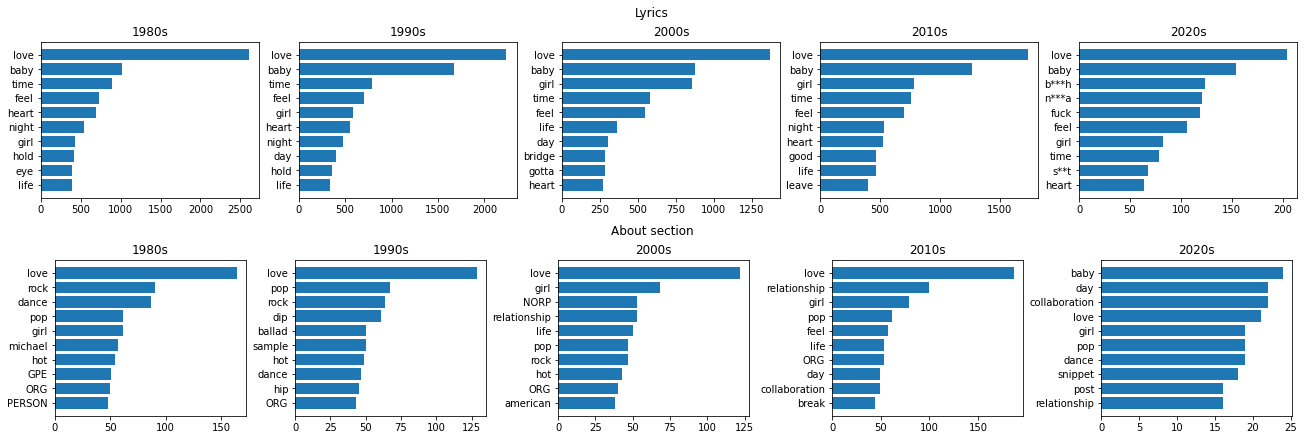

In [ ]:
fig = plt.figure(constrained_layout=True, figsize=(18,6))

(lyr, ab) = fig.subfigures(2,1)

lyr.suptitle('Lyrics')
ax_lyr = lyr.subplots(1,5)
ax_lyr[0].barh(y=topNwords_lyrics('1980s', 10).word, width=topNwords_lyrics('1980s', 10).freq)
ax_lyr[0].title.set_text('1980s')
ax_lyr[1].barh(y=topNwords_lyrics('1990s', 10).word, width=topNwords_lyrics('1990s', 10).freq)
ax_lyr[1].title.set_text('1990s')
ax_lyr[2].barh(y=topNwords_lyrics('2000s', 10).word, width=topNwords_lyrics('2000s', 10).freq)
ax_lyr[2].title.set_text('2000s')
ax_lyr[3].barh(y=topNwords_lyrics('2010s', 10).word, width=topNwords_lyrics('2010s', 10).freq)
ax_lyr[3].title.set_text('2010s')
ax_lyr[4].barh(y=topNwords_lyrics('2020s', 10).word, width=topNwords_lyrics('2020s', 10).freq)
ax_lyr[4].title.set_text('2020s')

ab.suptitle('About section')
ax_ab = ab.subplots(1, 5)
ax_ab[0].barh(y=topNwords_about('1980s', 10).word, width=topNwords_about('1980s', 10).freq)
ax_ab[0].title.set_text('1980s')
ax_ab[1].barh(y=topNwords_about('1990s', 10).word, width=topNwords_about('1990s', 10).freq)
ax_ab[1].title.set_text('1990s')
ax_ab[2].barh(y=topNwords_about('2000s', 10).word, width=topNwords_about('2000s', 10).freq)
ax_ab[2].title.set_text('2000s')
ax_ab[3].barh(y=topNwords_about('2010s', 10).word, width=topNwords_about('2010s', 10).freq)
ax_ab[3].title.set_text('2010s')
ax_ab[4].barh(y=topNwords_about('2020s', 10).word, width=topNwords_about('2020s', 10).freq)
ax_ab[4].title.set_text('2020s')

plt.show()

##Sentiment Analysis

In [ ]:
# function to assign VADER valence compound score

def assign_sentiment(lyric):
  if type(lyric) != str:
    return None
  else:
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(lyric)['compound']

# creating support dataframe for graphs and applying cleaning functions
vader_comp = df_all[['Year', 'Pre-processedlyrics', 'Pre-processedabout']]
vader_comp.loc[~vader_comp['Pre-processedabout'].isna(),'Pre-processedabout'] = vader_comp.loc[~vader_comp['Pre-processedabout'].isna(),'Pre-processedabout'].apply(clean).apply(lambda x: ' '.join(x))
vader_comp.loc[~vader_comp['Pre-processedlyrics'].isna(),'Pre-processedlyrics'] = vader_comp.loc[~vader_comp['Pre-processedlyrics'].isna(),'Pre-processedlyrics'].apply(clean).apply(lambda x: ' '.join(x))

vader_comp['vader_lyrics'] = vader_comp['Pre-processedlyrics'].apply(assign_sentiment)
vader_comp['vader_about'] = vader_comp['Pre-processedabout'].apply(assign_sentiment)

vader_comp['vader_diff'] = np.where((vader_comp['vader_lyrics']==None) | (vader_comp['vader_about']==None),
                                    np.nan,
                                    vader_comp['vader_lyrics']-vader_comp['vader_about'])
vader_comp['Decade'] = vader_comp['Year'].apply(add_decade)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

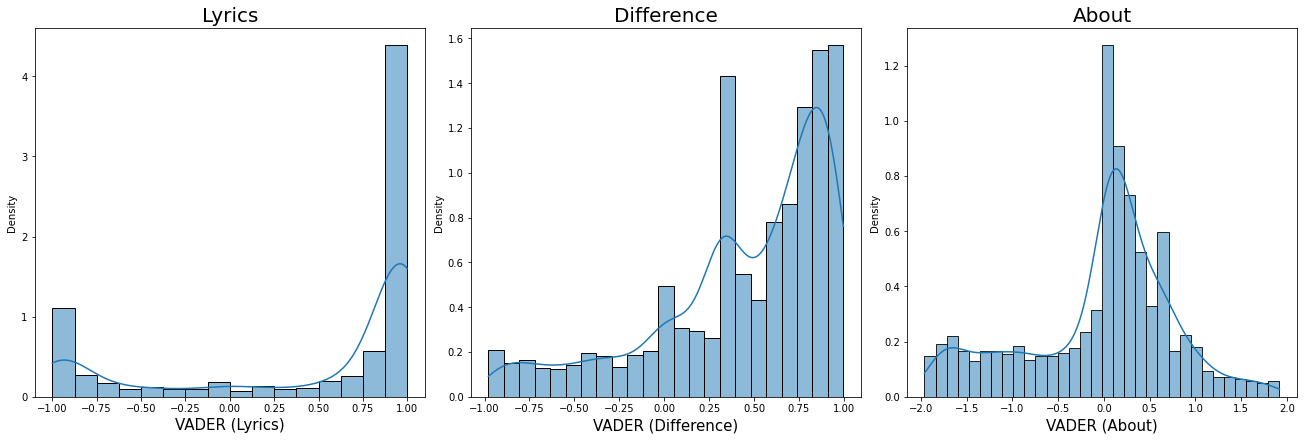

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(18,6), constrained_layout=True)

sns.histplot(vader_comp[['vader_lyrics']].dropna(), x = 'vader_lyrics', kde=True, stat='density', ax = axes[0])
axes[0].set_title('Lyrics', fontsize=20)
axes[0].set_ylabel('Density')
axes[0].set_xlabel('VADER (Lyrics)', fontsize=15)

sns.histplot(vader_comp[['vader_about']].dropna(), x = 'vader_about', kde=True, stat='density', ax = axes[1])
axes[2].set_title('About', fontsize=20)
axes[2].set_ylabel('Density')
axes[2].set_xlabel('VADER (About)', fontsize=15)

sns.histplot(vader_comp[['vader_diff']].dropna(), x = 'vader_diff', kde=True, stat='density', ax = axes[2])
axes[1].set_title('Difference', fontsize=20)
axes[1].set_ylabel('Density')
axes[1].set_xlabel('VADER (Difference)', fontsize=15)

plt.show()

###Distribution of amount of songs across decades

In [ ]:
# support dataframes for graphs

count_lyrics = vader_comp.dropna(subset=['Pre-processedlyrics']).groupby('Decade').agg('count')['Pre-processedlyrics']
count_about = vader_comp.dropna(subset=['Pre-processedabout']).groupby('Decade').agg('count')['Pre-processedabout']

count_all = pd.DataFrame({'Lyrics':count_lyrics,
                          'About':count_about,
                          'Decade':count_lyrics.index})

# melted to one long dataframe
count_all = count_all.melt(id_vars=['Decade'], 
                           value_vars=['Lyrics', 'About'],
                           var_name='Source',
                           value_name='Count')

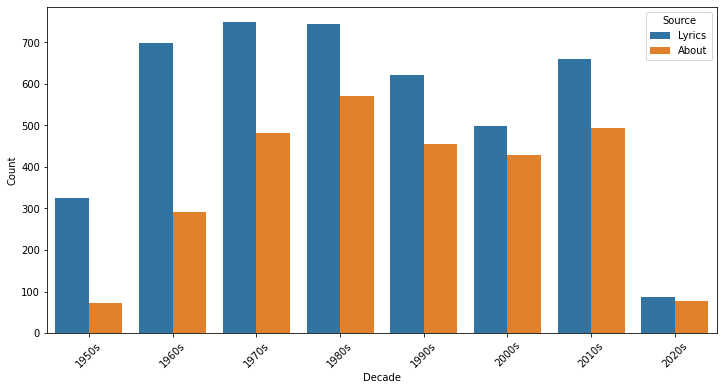

In [ ]:
plt.subplots(figsize=(12,6))
ax = sns.barplot(x='Decade', y='Count', hue='Source', data=count_all)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
sns.despine(fig)

# LDA

## Vectorizing data

In [ ]:
#If pre-processed about is desired then change to:
#loki = df["Pre-processedabout"].dropna()


test_corpus = []
loki = df["Pre-processedlyrics"].dropna()
for lyric in loki:
        test_corpus.append(lyric)

data_ready = []

for n in test_corpus:
    n2 = []
    n = ast.literal_eval(n)
    for word in n:
        n2.append(word)
    data_ready.append(n2)




def do_nothing(tokens):
    return tokens


count_vect = TfidfVectorizer(min_df = 0.01,
                             max_df = 0.99,
                             tokenizer=do_nothing, lowercase=False)

X2 = count_vect.fit_transform(data_ready)

tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(X2)

all_elements = count_vect.get_feature_names()
all_vectorized_songs = X.todense().tolist()

matr = []



for i in range(len(all_vectorized_songs)):
  lst = []
  matr_entry = all_vectorized_songs[i]
  for j in range(len(matr_entry)):
    if(matr_entry[j] != 0):
      lst.append(all_elements[j])

  matr.append(lst)


data_ready = matr

data_ready = [i for i in data_ready if type(i)==list]





/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Generating the LDA model

In [ ]:
cp = data_ready

# Create Dictionary
id2word = gensim.corpora.dictionary.Dictionary(cp)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in cp]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           random_state=100,
                                           update_every=1,
                                           num_topics=10,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

topics = lda_model.show_topics(formatted=False)


## Word Cloud

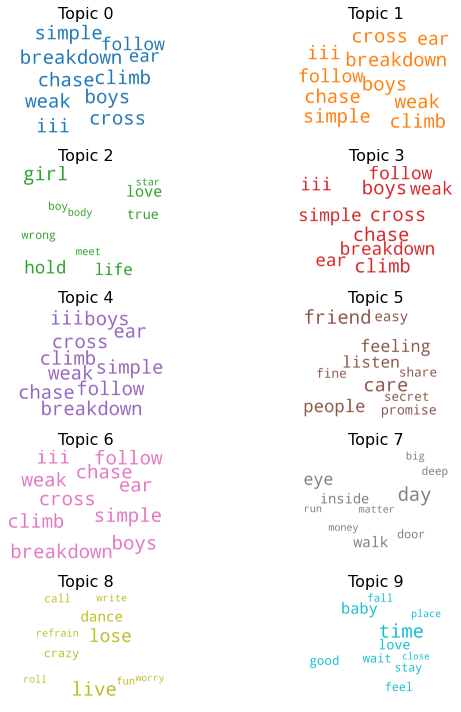

In [ ]:
# 1. Wordcloud of Top N words ~ Displaying up to 10 topics


cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)


if len(topics) %2 == 0:
  sub_a = int(len(topics)/2)
  sub_b = 2
elif len(topics) %3 == 0:
  sub_a = int(len(topics)/3)
  sub_b = 3
else:
  sub_a = len(topics)
  sub_b = 1




fig, axes = plt.subplots(sub_a, sub_b, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

## Displaying the importance of top N words ~ displays up to 10 categories

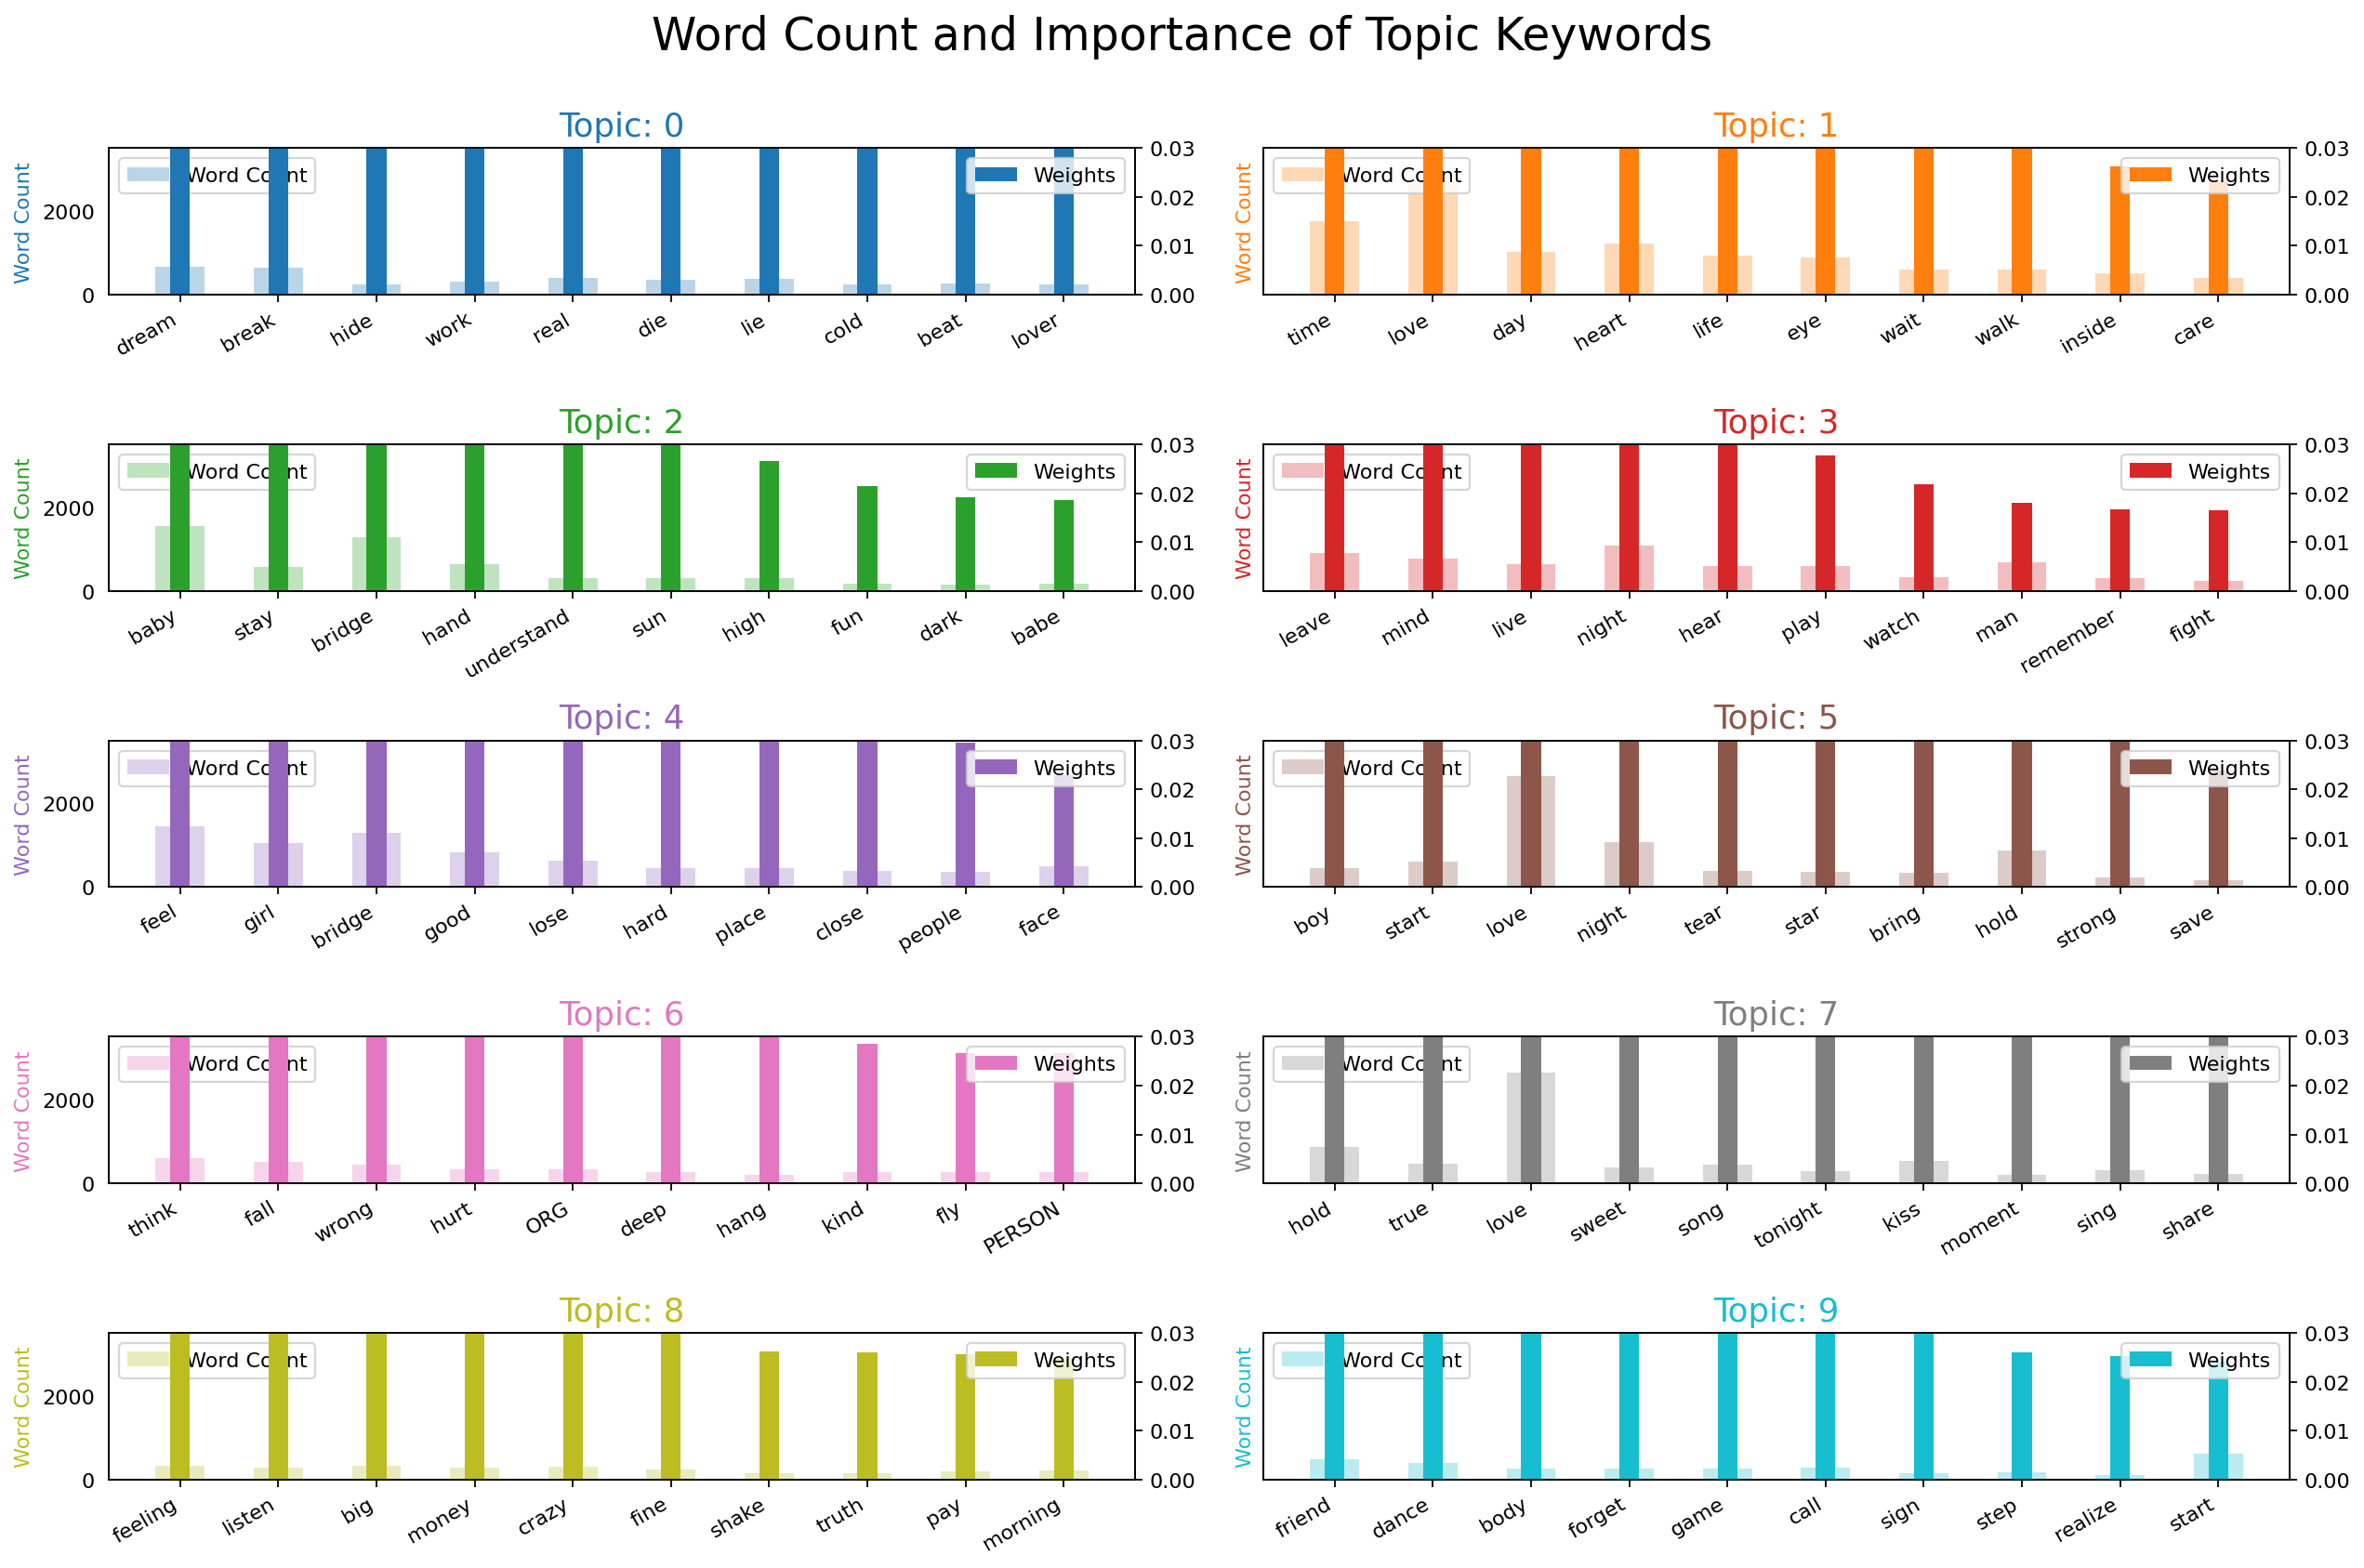

In [ ]:
# 2. Shopwing the importance of Top N words in each topic

# When it comes to the keywords in the topics, the importance (weights) of the keywords matters. Along with that, how frequently the words have appeared in the documents is also interesting to look.
# We want to keep an eye out on the words that occur in multiple topics and the ones whose relative frequency is more than the weight. Often such words turn out to be less important. 
# The chart drawn below is a result of adding several such words to the stop words list in the beginning and re-running the training process.

from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count']) 

if len(topics) %2 == 0:
  sub_a = int(len(topics)/2)
  sub_b = 2
elif len(topics) %3 == 0:
  sub_a = int(len(topics)/3)
  sub_b = 3
else:
  sub_a = len(topics)
  sub_b = 1


# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(sub_a, sub_b, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

## Sentence topic colouring ~ displays up to 10 categories

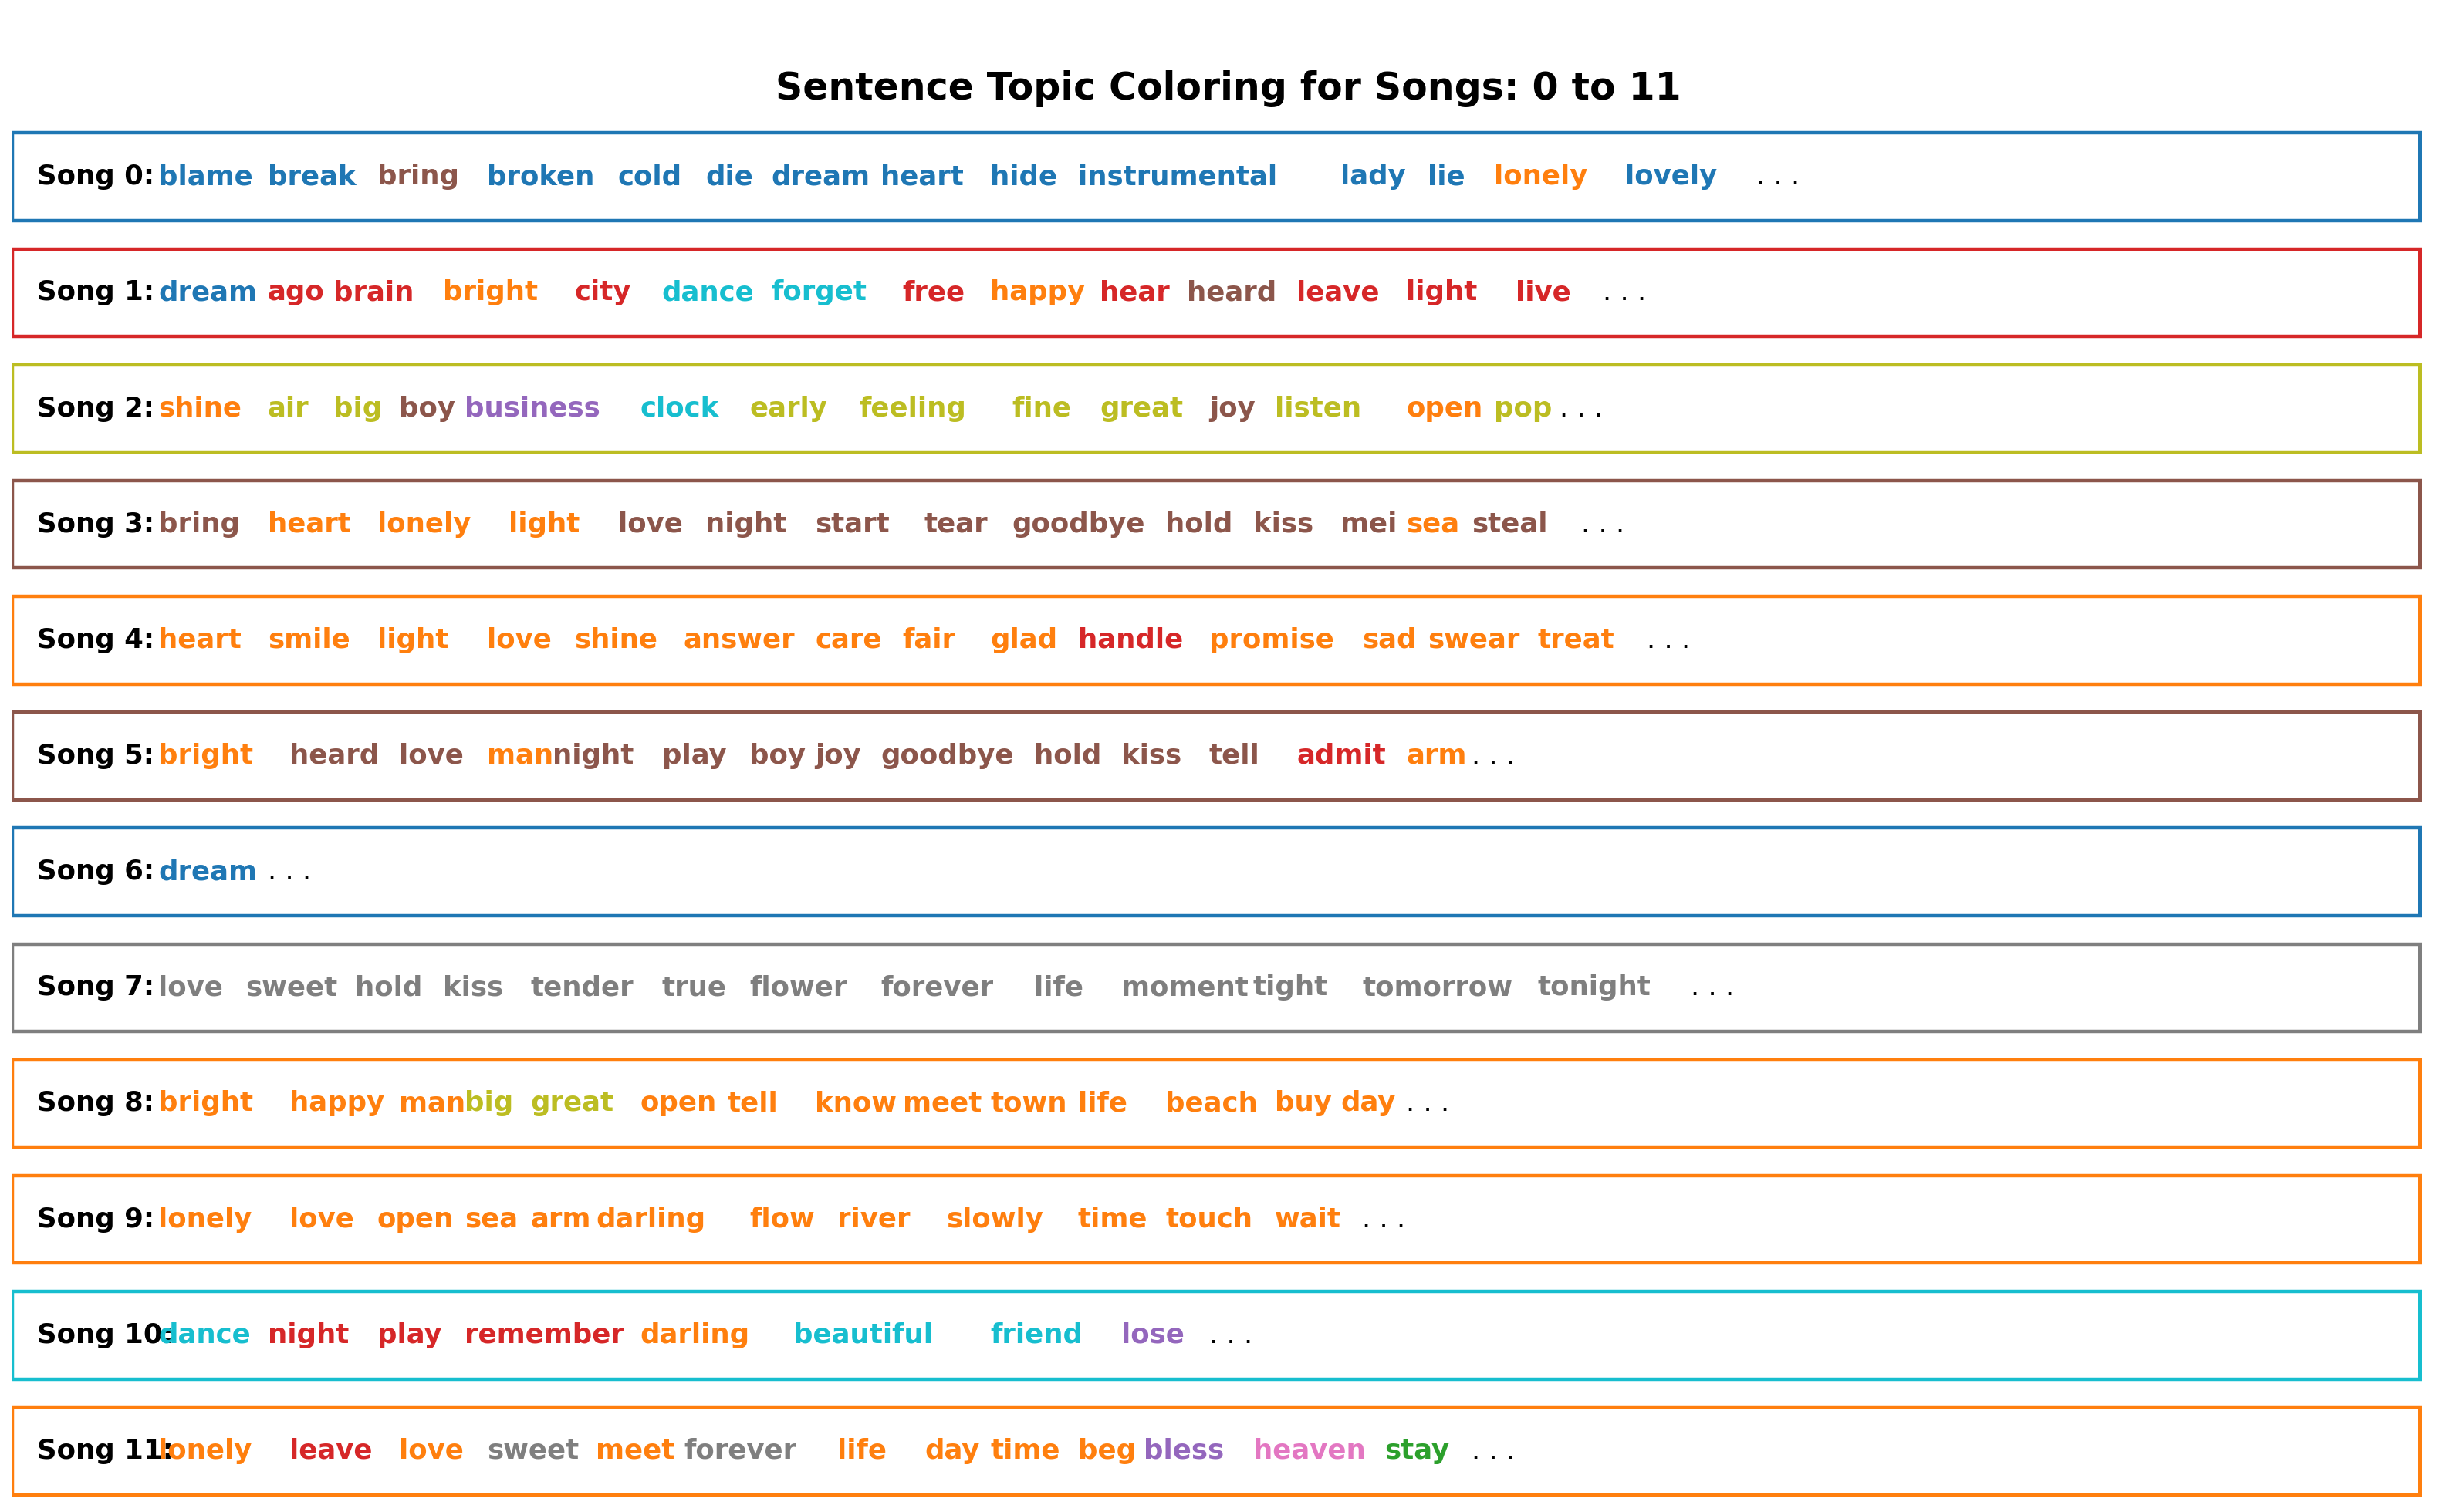

In [ ]:
# 3.Sentence Coloring of N Sentences

#Each word in the document is representative of one of the 4 topics. Let’s color each word in the given documents by the topic id it is attributed to.
#The color of the enclosing rectangle is the topic assigned to the document.


def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Song " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Songs: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()    

## Showing topic distribution by dominant topics and topic distribution by topic weights

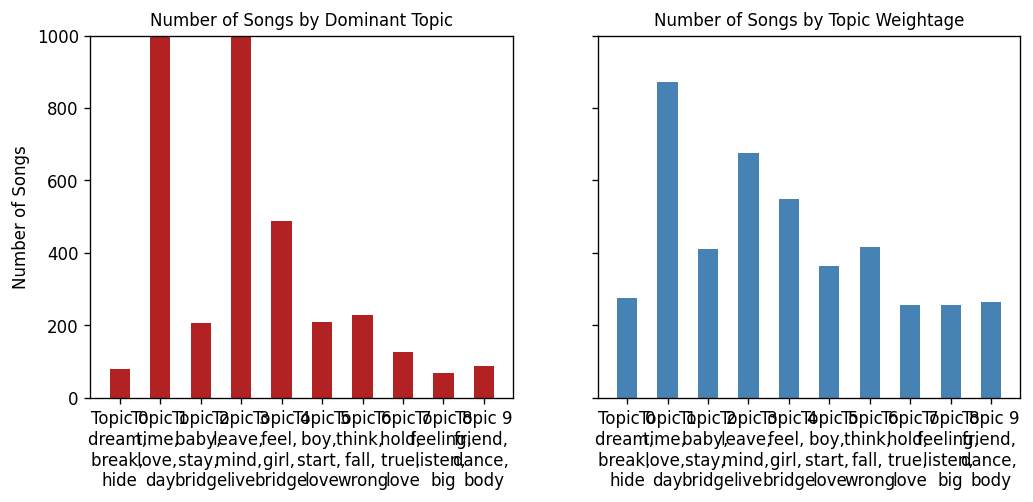

In [ ]:
# 4.Showing Topic Distribution by Dominant Topics AND Topic Distribution by Topic Weights


# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Song_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Songs by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Songs')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Songs by Topic Weightage', fontdict=dict(size=10))

plt.show()

#About the two plots:

#1.The number of documents for each topic by assigning the document to the topic that has the most weight in that document.
#2.The number of documents for each topic by by summing up the actual weight contribution of each topic to respective documents.


## Visualizing the clusters of documents in a 2D space using t-SNE

In [ ]:
# 5.Visualize the clusters of documents in a 2D space using t-SNE (t-distributed stochastic neighbor embedding) algorithm.

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 10
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  kwargs['lwork'] = ret[-2][0].real.astype(numpy.int)
/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will no

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 686 samples in 0.002s...
[t-SNE] Computed neighbors for 686 samples in 0.019s...
[t-SNE] Computed conditional probabilities for sample 686 / 686
[t-SNE] Mean sigma: 0.091035
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.087952
[t-SNE] KL divergence after 1000 iterations: 0.570469


## Using PYLDA vis

In [ ]:
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.225928  0.112748       1        1  18.861281
3     -0.018569 -0.090863       2        1  16.762721
4      0.160892  0.218007       3        1  12.301958
6      0.164753 -0.107536       4        1   9.330060
2      0.205875  0.167859       5        1   9.025202
5     -0.252008 -0.005236       6        1   8.248086
9      0.028772 -0.254250       7        1   7.457344
8      0.108271 -0.231823       8        1   6.329829
0      0.100474  0.147568       9        1   6.234061
7     -0.272533  0.043526      10        1   5.449458, topic_info=      Term         Freq        Total Category  logprob  loglift
34    love  2696.000000  2696.000000  Default  30.0000  30.0000
122   time  1990.000000  1990.000000  Default  29.0000  29.0000
207   baby  1350.000000  1350.000000  Default  28.0000  28.0000
183   feel  1496.000000  1496.000000  Default  27.0000  27.0000
63    hold  1059.000000  1059.000000  Default  26.0000  26.0000
..     ...          ...          ...      ...      ...      ...
63    hold   723.678693  1059.646765  Topic10  -2.1307   2.5283
64    kiss   271.311329   455.442448  Topic10  -3.1117   2.3917
443  write   124.981538   207.502916  Topic10  -3.8868   2.4027
34    love   527.441877  2696.835212  Topic10  -2.4470   1.2779
90    life   184.304192  1068.175954  Topic10  -3.4984   1.1525

[376 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
228       2  0.996184     GPE
159       4  0.997449     ORG
289       4  0.995034  PERSON
393      10  0.980429     add
48        8  0.993800     air
...     ...       ...     ...
443      10  0.602401   write
260       4  0.998758   wrong
117       1  0.992520    year
321       3  0.548711   young
321       6  0.448549   young

[362 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 5, 7, 3, 6, 10, 9, 1, 8])